In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Initial EDA of the data. 


## Basic insights gather from the exploration:
* Loans are most acquired for education purposes
* Highest loan interest rate around 23% - with a loan amount of 22250
* Majority of loans have a grade A
* Max loan amount 35000 - with an interest rate of 15.23%

In [4]:
df = pd.read_csv('/Credit-Risk-Modelling/Datasets/cr_loan2.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [6]:
df.isnull().sum()  #Return the number of missing values in each column.

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [7]:
# Returns the first n rows ordered by columns in descending order.
df.nlargest(5, 'person_age')

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.00,N,25
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4


In [8]:
df.nlargest(5, 'person_emp_length') 

# theres two individual with employment length > 60

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4
32355,78,48000,RENT,41.0,MEDICAL,A,3000,7.51,0,0.06,N,25
32515,53,106000,MORTGAGE,38.0,PERSONAL,B,20000,9.88,0,0.19,N,23
32428,58,49000,MORTGAGE,34.0,MEDICAL,D,7500,13.55,1,0.15,Y,24


In [9]:
# 7108 default loans.
df['loan_status'].value_counts()

0    25473
1     7108
Name: loan_status, dtype: int64

In [10]:
df.corr()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.173202,0.163106,0.050787,0.012580,-0.021629,-0.042411,0.859133
person_income,0.173202,1.000000,0.134268,0.266820,0.000792,-0.144449,-0.254471,0.117987
person_emp_length,0.163106,0.134268,1.000000,0.113082,-0.056405,-0.082489,-0.054111,0.144699
loan_amnt,0.050787,0.266820,0.113082,1.000000,0.146813,0.105376,0.572612,0.041967
loan_int_rate,0.012580,0.000792,-0.056405,0.146813,1.000000,0.335133,0.120314,0.016696
loan_status,-0.021629,-0.144449,-0.082489,0.105376,0.335133,1.000000,0.379366,-0.015529
loan_percent_income,-0.042411,-0.254471,-0.054111,0.572612,0.120314,0.379366,1.000000,-0.031690
cb_person_cred_hist_length,0.859133,0.117987,0.144699,0.041967,0.016696,-0.015529,-0.031690,1.000000


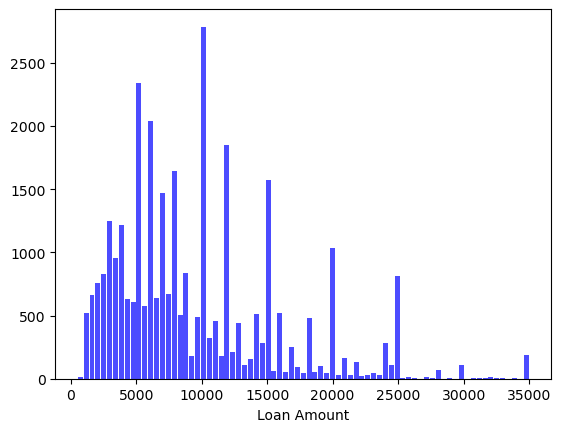

In [11]:
# Look at the distribution of loan amounts with a histogram
n, bins, patches = plt.hist(x=df['loan_amnt'], bins='auto', color='blue',alpha=0.7, rwidth=0.85)
plt.xlabel("Loan Amount")
plt.show()

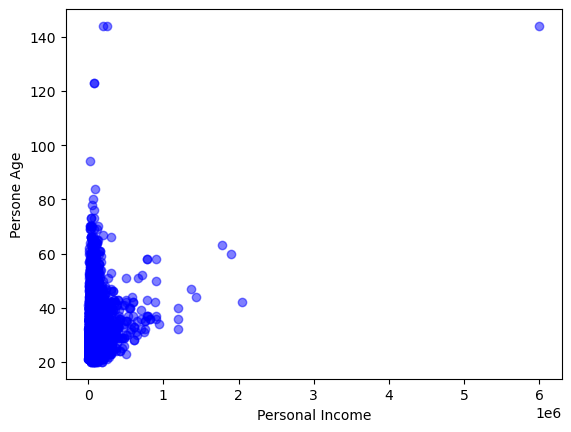

In [12]:
# Plot a scatter plot of income against age

plt.scatter(df['person_income'], df['person_age'],c='blue', alpha=0.5)
plt.xlabel('Personal Income')
plt.ylabel('Persone Age')
plt.show()

In [13]:
pd.crosstab(df['loan_intent'], df['loan_status'], margins=True)

loan_status,0,1,All
loan_intent,,,
DEBTCONSOLIDATION,3722,1490,5212
EDUCATION,5342,1111,6453
HOMEIMPROVEMENT,2664,941,3605
MEDICAL,4450,1621,6071
PERSONAL,4423,1098,5521
VENTURE,4872,847,5719
All,25473,7108,32581


In [14]:
pd.crosstab(df['person_home_ownership'],[df['loan_status'], df['loan_grade']], margins=True)


loan_status               0                                   1              \
loan_grade                A     B     C     D    E   F  G     A     B     C   
person_home_ownership                                                         
MORTGAGE               5219  3729  1934   658  178  36  0   239   324   321   
OTHER                    23    29    11     9    2   0  0     3     5     6   
OWN                     860   770   464   264   26   7  0    66    34    31   
RENT                   3602  4222  2710   554  137  28  1   765  1338   981   
All                    9704  8750  5119  1485  343  71  1  1073  1701  1339   

loan_status                                  All  
loan_grade                D    E    F   G         
person_home_ownership                             
MORTGAGE                553  161   61  31  13444  
OTHER                    11    6    2   0    107  
OWN                      18   31    8   5   2584  
RENT                   1559  423   99  27  16446  
All                    2141  621  170  63  32581

In [15]:
pd.crosstab(df['person_home_ownership'],df['loan_status'], 
            values=df['loan_percent_income'], aggfunc=np.mean, margins=True)


loan_status,0,1,All
person_home_ownership,,,
MORTGAGE,0.146504,0.184882,0.151328
OTHER,0.143784,0.300000,0.191963
OWN,0.180013,0.297358,0.188777
RENT,0.144611,0.264859,0.182573
All,0.148805,0.246889,0.170203


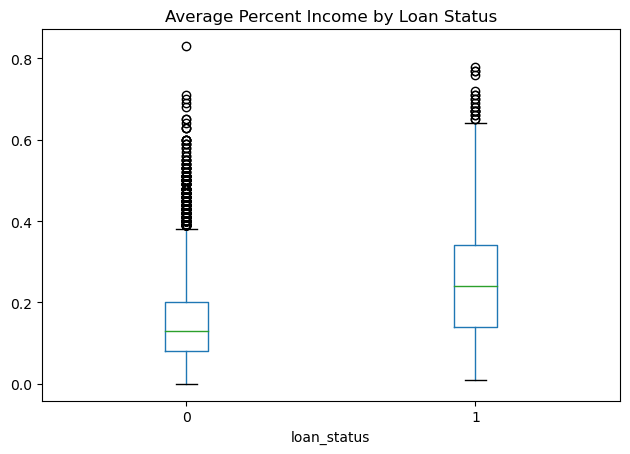

In [16]:
df.boxplot(column='loan_percent_income', by='loan_status', grid=False)
plt.title('Average Percent Income by Loan Status')
plt.suptitle('')
plt.tight_layout()
plt.show()

### Outliers of the Data

Looking at the histogram an scatterplots we can clearly see that theres some data points out of range.
* Persons age > 120. 
* Employment contract length > 60.

In [17]:
# Finding outliers with cross tables
pd.crosstab(df['loan_status'],df['person_home_ownership'], 
            values=df['person_emp_length'], aggfunc=np.max, margins=True)

person_home_ownership,MORTGAGE,OTHER,OWN,RENT,All
loan_status,,,,,
0,123.0,24.0,31.0,41.0,123.0
1,34.0,11.0,17.0,123.0,123.0
All,123.0,24.0,31.0,123.0,123.0


In [18]:
# removing emp contract length > 60.
index_60_plus = df[df['person_emp_length'] > 60].index

In [19]:
df.drop(index_60_plus, inplace=True)  # remove rows that have emp length > 60S

In [20]:
pd.crosstab(df['loan_status'],df['person_home_ownership'], 
            values=df['person_emp_length'], aggfunc=[np.min, np.max])

amin                     amax                  
person_home_ownership MORTGAGE OTHER  OWN RENT MORTGAGE OTHER   OWN  RENT
loan_status                                                              
0                          0.0   0.0  0.0  0.0     38.0  24.0  31.0  41.0
1                          0.0   0.0  0.0  0.0     34.0  11.0  17.0  27.0

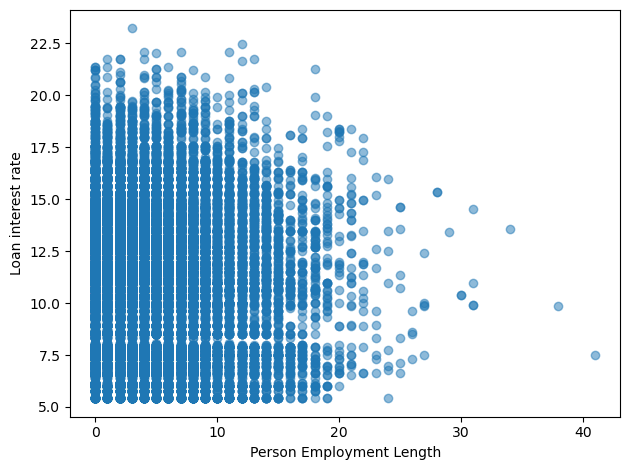

In [21]:
plt.scatter(df['person_emp_length'], df['loan_int_rate'], alpha=0.5)
plt.xlabel('Person Employment Length')
plt.ylabel('Loan interest rate')
plt.tight_layout()
plt.show();


A borrower that is considered low risk by the lender will have a lower interest rate. <br>A loan that is considered high risk will have a higher interest rate.

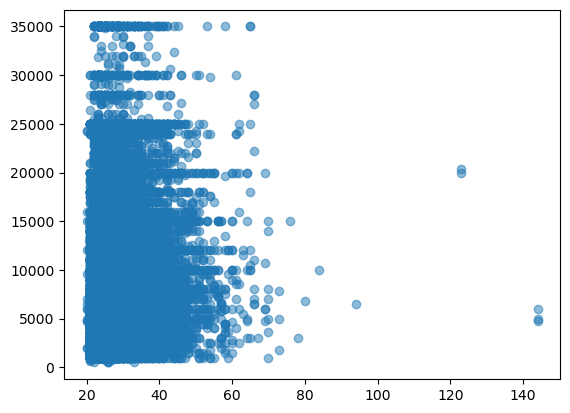

In [22]:
# confirming age has outliers
plt.scatter(df['person_age'], df['loan_amnt'], alpha=0.5)

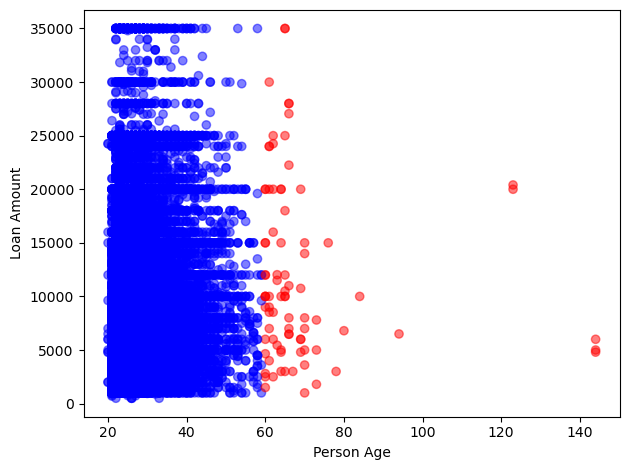

In [23]:
# Calculate an outlier limit (I chose 5 Standard deviations from the mean)
k_bar = np.mean(df['person_age'])
outlier_limit = 5 * np.std(df['person_age'])

# Generate a colour vector
kcolors = ['red' if abs(value - k_bar) > outlier_limit else 'blue' for value in df['person_age']]


plt.scatter(df['person_age'], df['loan_amnt'], alpha=0.5, c=kcolors)
plt.xlabel('Person Age')
plt.ylabel('Loan Amount')
plt.tight_layout()
plt.show();

In [24]:
# drop rows that have age outliers
age_out = df[df['person_age'] > 100].index
df.drop(age_out, inplace=True)

In [25]:
df.nlargest(5, 'person_age')

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32416,94,24000,RENT,1.0,MEDICAL,C,6500,NaN,0,0.27,N,27
32506,84,94800,MORTGAGE,2.0,PERSONAL,A,10000,7.51,0,0.11,N,24
32422,80,64000,RENT,7.0,MEDICAL,B,6800,11.71,0,0.11,N,25
32355,78,48000,RENT,41.0,MEDICAL,A,3000,7.51,0,0.06,N,25
32534,76,75000,RENT,23.0,MEDICAL,A,15000,8.94,0,0.20,N,25


In [26]:
from matplotlib.colors import ListedColormap, BoundaryNorm

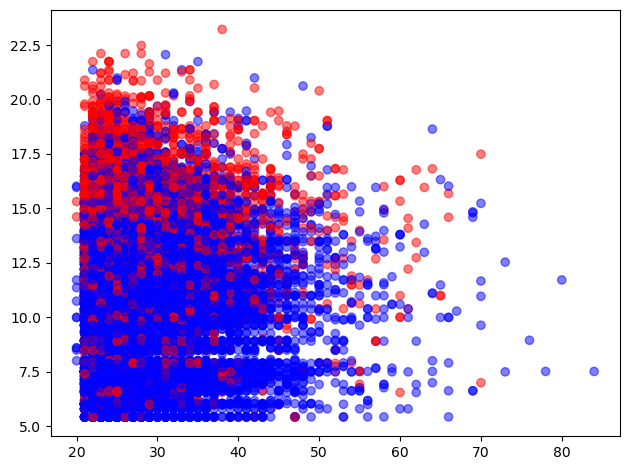

In [27]:
# plot data points red when the loan is default.
cmap = ListedColormap(['blue', 'red'])
plt.scatter(df['person_age'], df['loan_int_rate'],
            c=df['loan_status'], cmap=cmap,
            alpha=0.5)

plt.tight_layout()
plt.show();

In [28]:
df.sample(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
28075,28,64000,MORTGAGE,3.0,MEDICAL,C,5000,13.23,0,0.08,N,6
4035,22,63000,RENT,5.0,EDUCATION,B,4000,NaN,0,0.06,N,4
4803,24,42000,MORTGAGE,3.0,MEDICAL,A,8500,7.51,0,0.20,N,4
27110,28,111000,MORTGAGE,12.0,DEBTCONSOLIDATION,F,25000,19.79,1,0.23,N,5
11892,23,71000,MORTGAGE,2.0,DEBTCONSOLIDATION,E,20000,15.13,1,0.28,Y,2
14329,26,105000,OWN,10.0,HOMEIMPROVEMENT,B,4800,11.71,0,0.05,N,4
5188,23,83000,RENT,7.0,DEBTCONSOLIDATION,B,9000,10.59,0,0.11,N,4
29024,32,40100,RENT,3.0,MEDICAL,C,7175,12.99,0,0.18,Y,6
8445,26,58000,MORTGAGE,5.0,MEDICAL,B,31300,11.71,0,0.54,N,3
999,25,55344,RENT,2.0,HOMEIMPROVEMENT,B,18000,10.99,1,0.33,N,4


In [29]:
df['loan_grade'].value_counts()

A    10776
B    10448
C     6456
D     3625
E      964
F      241
G       64
Name: loan_grade, dtype: int64

In [30]:
pd.crosstab(df['loan_grade'], df['loan_status'])

loan_status,0,1
loan_grade,,
A,9703,1073
B,8747,1701
C,5117,1339
D,1485,2140
E,343,621
F,71,170
G,1,63


In [31]:
df['loan_int_rate'].min(), df['loan_int_rate'].max() 

(5.42, 23.22)

<AxesSubplot:>

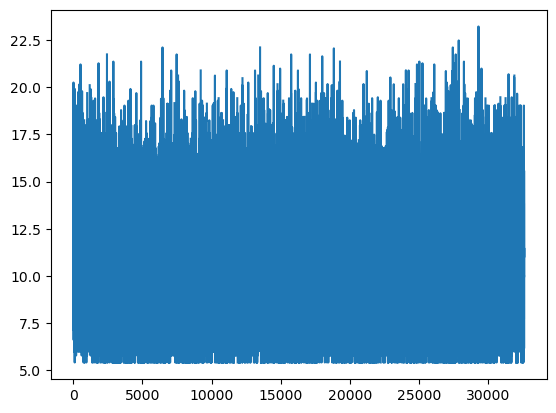

In [32]:
df['loan_int_rate'].plot()

In [33]:
df.nlargest(5, 'loan_int_rate')

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
29277,38,83000,RENT,3.0,HOMEIMPROVEMENT,G,22250,23.22,1,0.27,Y,12
27851,28,288000,MORTGAGE,12.0,VENTURE,G,18000,22.48,1,0.06,Y,9
6449,23,34255,RENT,7.0,VENTURE,G,6000,22.11,1,0.18,Y,3
13499,26,44000,RENT,4.0,HOMEIMPROVEMENT,G,12500,22.11,1,0.28,Y,2
27425,28,128000,MORTGAGE,11.0,DEBTCONSOLIDATION,G,14400,22.11,1,0.11,Y,8


In [34]:
df.nsmallest(5, 'loan_int_rate')


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
105,22,12600,MORTGAGE,NaN,PERSONAL,A,2000,5.42,1,0.16,N,4
741,22,21600,MORTGAGE,NaN,EDUCATION,A,4025,5.42,0,0.19,N,4
742,24,21600,MORTGAGE,8.0,MEDICAL,A,8000,5.42,0,0.37,N,2
802,24,22000,MORTGAGE,8.0,PERSONAL,A,8000,5.42,0,0.36,N,4
829,26,22296,OWN,NaN,PERSONAL,A,5400,5.42,0,0.24,N,3


In [35]:
# find loans which int rate is smaller than the mean: 11%
df[df['loan_int_rate'] < np.mean(df['loan_int_rate'])].sort_values('loan_int_rate', ascending=False)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
4810,23,34800,RENT,1.0,HOMEIMPROVEMENT,B,5000,10.99,1,0.14,N,2
24523,28,74000,MORTGAGE,13.0,PERSONAL,B,7800,10.99,0,0.11,N,7
11039,26,71046,MORTGAGE,10.0,DEBTCONSOLIDATION,B,6500,10.99,0,0.09,N,4
12308,22,31200,RENT,7.0,EDUCATION,B,12000,10.99,1,0.38,N,2
2327,24,29000,RENT,4.0,PERSONAL,B,2500,10.99,0,0.09,N,3
...,...,...,...,...,...,...,...,...,...,...,...,...
24382,29,72000,MORTGAGE,13.0,MEDICAL,A,7400,5.42,0,0.10,N,8
3256,21,36000,MORTGAGE,1.0,MEDICAL,A,4000,5.42,0,0.11,N,3
24380,27,72000,MORTGAGE,6.0,EDUCATION,A,6000,5.42,0,0.08,N,10
15259,26,127000,MORTGAGE,10.0,EDUCATION,A,6000,5.42,0,0.05,N,3


In [36]:
df['loan_intent'].value_counts()

EDUCATION            6451
MEDICAL              6071
VENTURE              5716
PERSONAL             5519
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: loan_intent, dtype: int64

In [37]:
df.nlargest(5, 'loan_amnt')

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2


## DEALING WITH MISSING VALUES

In [38]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32574.000000,3.257400e+04,31679.000000,32574.000000,29459.000000,32574.000000,32574.000000,32574.000000
mean,27.718426,6.587848e+04,4.782064,9588.018051,11.011529,0.218180,0.170202,5.804108
std,6.204987,5.253194e+04,4.034948,6320.249598,3.240497,0.413017,0.106755,4.053873
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,94.000000,2.039784e+06,41.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [39]:
df.isnull().sum()  #Return the number of missing values in each column.


person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3115
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

There are two columns with missing values.
* I will use the median of the data to fill them

In [40]:
# data when personal employment length is 0
df[df['person_emp_length'].isnull()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
105,22,12600,MORTGAGE,NaN,PERSONAL,A,2000,5.42,1,0.16,N,4
222,24,185000,MORTGAGE,NaN,EDUCATION,B,35000,12.42,0,0.19,N,2
379,24,16800,MORTGAGE,NaN,DEBTCONSOLIDATION,A,3900,NaN,1,0.23,N,3
407,25,52000,RENT,NaN,PERSONAL,B,24000,10.74,1,0.46,N,2
408,22,17352,MORTGAGE,NaN,EDUCATION,C,2250,15.27,0,0.13,Y,3
...,...,...,...,...,...,...,...,...,...,...,...,...
32285,38,12000,OWN,NaN,EDUCATION,A,4800,7.29,1,0.40,N,12
32328,51,18408,RENT,NaN,PERSONAL,C,1000,14.65,1,0.05,Y,20
32360,70,39996,RENT,NaN,MEDICAL,C,3600,15.23,0,0.09,Y,19
32453,56,32400,RENT,NaN,MEDICAL,A,8575,7.51,0,0.26,N,18


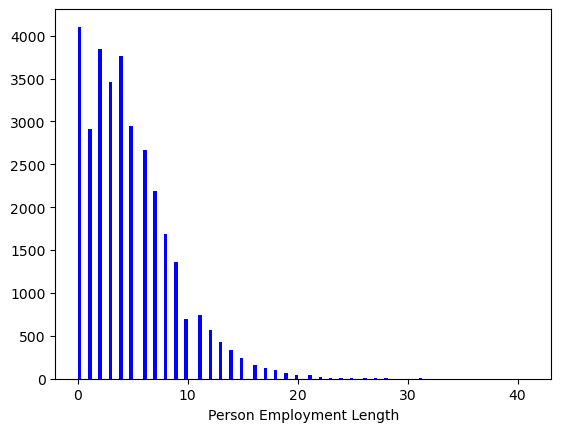

In [41]:

# Impute the null values with the median value for all employment lengths
df['person_emp_length'].fillna((df['person_emp_length'].median()), inplace=True)

# Create a histogram of employment length
n, bins, patches = plt.hist(df['person_emp_length'], bins='auto', color='blue')
plt.xlabel("Person Employment Length")
plt.show()

<h4>Dealing with the interest rates missing values</h4>

In [42]:
# replace missing values in the interest rates column
df['loan_int_rate'].fillna(df['loan_int_rate'].median(), inplace=True)

In [43]:
df.isnull().sum()


person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [44]:
# Save the new df to a csv file
df.to_csv(r'/Credit-Risk-Modelling/Datasets/loan_data_clean.csv', encoding='utf-8', index=False)